
Graphing Calculator Menu
1. Graph one or more functions
2. Generate a table of (x, y) values
3. Shade above or below the line
4. Solve and graph a system of two equations
5. Solve a quadratic equation
6. Zoom in/out on a graph
7. Exit
Select an option (1-7): 3
Enter a function of x (e.g., 'x**2 + 2*x + 1'): x**2 + 2*x + 1
Shade 'above' or 'below' the curve? below


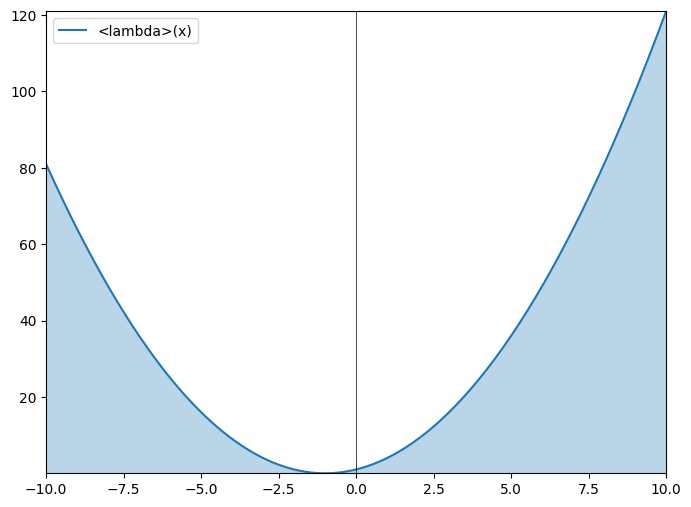


Graphing Calculator Menu
1. Graph one or more functions
2. Generate a table of (x, y) values
3. Shade above or below the line
4. Solve and graph a system of two equations
5. Solve a quadratic equation
6. Zoom in/out on a graph
7. Exit
Select an option (1-7): 7
Exiting the graphing calculator.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sympy import symbols, Eq, solve

class GraphingCalculator:
    def __init__(self):
        self.x, self.y = symbols('x y')

    def graph_functions(self, functions, x_range=(-10, 10), zoom=1):
        x = np.linspace(x_range[0], x_range[1], 400)
        plt.figure(figsize=(8, 6))

        for func in functions:
            y = func(x)
            plt.plot(x, y, label=f'{func.__name__}(x)')

        plt.xlim(x_range[0] / zoom, x_range[1] / zoom)
        plt.ylim(min([func(x_range[0]) for func in functions]), max([func(x_range[1]) for func in functions]))
        plt.axhline(0, color='black', linewidth=0.5)
        plt.axvline(0, color='black', linewidth=0.5)
        plt.legend()
        plt.show()

    def generate_table(self, func, x_range=(-10, 10), num_points=10):
        x_values = np.linspace(x_range[0], x_range[1], num_points)
        y_values = func(x_values)
        table = pd.DataFrame({'x': x_values, 'y': y_values})
        return table

    def graph_and_shade(self, func, x_range=(-10, 10), shade='above', zoom=1):
        x = np.linspace(x_range[0], x_range[1], 400)
        y = func(x)

        plt.figure(figsize=(8, 6))
        plt.plot(x, y, label=f'{func.__name__}(x)')

        if shade == 'above':
            plt.fill_between(x, y, y2=max(y), where=(y < max(y)), alpha=0.3)
        elif shade == 'below':
            plt.fill_between(x, y, y2=min(y), where=(y > min(y)), alpha=0.3)

        plt.xlim(x_range[0] / zoom, x_range[1] / zoom)
        plt.ylim(min(y) / zoom, max(y) / zoom)
        plt.axhline(0, color='black', linewidth=0.5)
        plt.axvline(0, color='black', linewidth=0.5)
        plt.legend()
        plt.show()

    def solve_and_graph_system(self, equations, x_range=(-10, 10)):
        sol = solve(equations, (self.x, self.y))

        def eq1(x_val):
            return solve(equations[0].subs(self.x, x_val), self.y)[0]

        def eq2(x_val):
            return solve(equations[1].subs(self.x, x_val), self.y)[0]

        self.graph_functions([eq1, eq2], x_range=x_range)
        return sol

    def solve_quadratic(self, a, b, c):
        D = b**2 - 4*a*c  # Discriminant
        if D > 0:
            root1 = (-b + np.sqrt(D)) / (2*a)
            root2 = (-b - np.sqrt(D)) / (2*a)
            return root1, root2
        elif D == 0:
            root = -b / (2*a)
            return root,
        else:
            return "No Real Roots"

    def zoom_graph(self, functions, x_range=(-10, 10), zoom_factor=2):
        self.graph_functions(functions, x_range, zoom=zoom_factor)

def user_input_function():
    func_str = input("Enter a function of x (e.g., 'x**2 + 2*x + 1'): ")
    return lambda x: eval(func_str)

def main():
    calculator = GraphingCalculator()

    while True:
        print("\nGraphing Calculator Menu")
        print("1. Graph one or more functions")
        print("2. Generate a table of (x, y) values")
        print("3. Shade above or below the line")
        print("4. Solve and graph a system of two equations")
        print("5. Solve a quadratic equation")
        print("6. Zoom in/out on a graph")
        print("7. Exit")

        choice = input("Select an option (1-7): ")

        if choice == '1':
            num_functions = int(input("Enter the number of functions to graph: "))
            functions = [user_input_function() for _ in range(num_functions)]
            calculator.graph_functions(functions)

        elif choice == '2':
            func = user_input_function()
            x_range = input("Enter the x range as a tuple (e.g., -10,10): ")
            x_range = tuple(map(int, x_range.split(',')))
            table = calculator.generate_table(func, x_range=x_range)
            import ace_tools as tools; tools.display_dataframe_to_user("Function Table", table)

        elif choice == '3':
            func = user_input_function()
            shade = input("Shade 'above' or 'below' the curve? ").strip().lower()
            calculator.graph_and_shade(func, shade=shade)

        elif choice == '4':
            eq1_str = input("Enter the first equation (e.g., '2*x + y - 3'): ")
            eq2_str = input("Enter the second equation (e.g., '-x + y - 2'): ")
            eq1 = Eq(eval(eq1_str.replace('=', '-(') + ')'), 0)
            eq2 = Eq(eval(eq2_str.replace('=', '-(') + ')'), 0)
            solution = calculator.solve_and_graph_system([eq1, eq2])
            print("Solution to the system of equations:", solution)

        elif choice == '5':
            a = float(input("Enter coefficient a: "))
            b = float(input("Enter coefficient b: "))
            c = float(input("Enter coefficient c: "))
            roots = calculator.solve_quadratic(a, b, c)
            print("Roots of the quadratic equation:", roots)

        elif choice == '6':
            num_functions = int(input("Enter the number of functions to graph: "))
            functions = [user_input_function() for _ in range(num_functions)]
            zoom_factor = float(input("Enter zoom factor (e.g., 2 for zoom in, 0.5 for zoom out): "))
            calculator.zoom_graph(functions, zoom_factor=zoom_factor)

        elif choice == '7':
            print("Exiting the graphing calculator.")
            break

        else:
            print("Invalid choice. Please select a valid option.")

if __name__ == "__main__":
    main()
